<a href="https://colab.research.google.com/github/shruti-2608/starting-/blob/main/braintumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
!pip install kaggle
from google.colab import files
files.upload()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shruti2608","key":"21cddf34e91ebdc3206e183d1ebcedb3"}'}

In [12]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [13]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 244MB/s]


In [14]:
import zipfile

zip_path = '/content/brain-mri-images-for-brain-tumor-detection.zip'
extract_path = '/content/brain_tumor_dataset/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

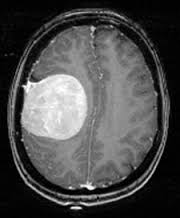

In [15]:
from PIL import Image

image_path = '/content/brain_tumor_dataset/brain_tumor_dataset/yes/Y1.jpg'
image = Image.open(image_path)
image.show()

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt



In [17]:
# Assuming the dataset is extracted in '/content/brain_tumor_dataset/' folder
dataset_path = '/content/brain_tumor_dataset/'

# Create an empty list to store file paths
file_paths = []

# Iterate through the dataset folders and collect file paths
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        file_paths.append(os.path.join(root, file))

# Create a DataFrame with the file paths
data = pd.DataFrame(file_paths, columns=['file_path'])


                                           file_path
0  /content/brain_tumor_dataset/brain_tumor_datas...
1  /content/brain_tumor_dataset/brain_tumor_datas...
2  /content/brain_tumor_dataset/brain_tumor_datas...
3  /content/brain_tumor_dataset/brain_tumor_datas...
4  /content/brain_tumor_dataset/brain_tumor_datas...
yes    310
no     196
Name: file_path, dtype: int64


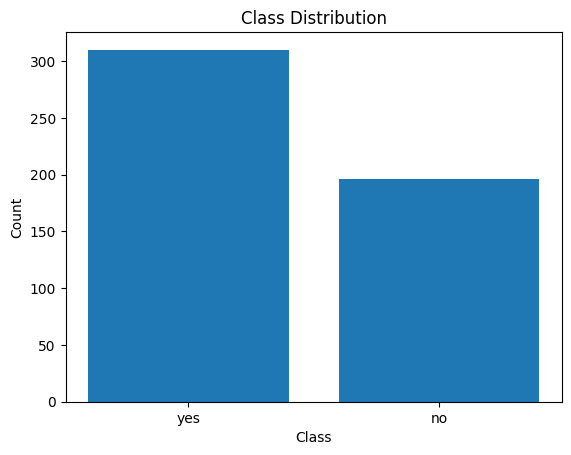

In [18]:
# Check the head of the DataFrame
print(data.head())

# Get the number of images in each class
class_counts = data['file_path'].apply(lambda x: x.split('/')[-2]).value_counts()
print(class_counts)

# Plot the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


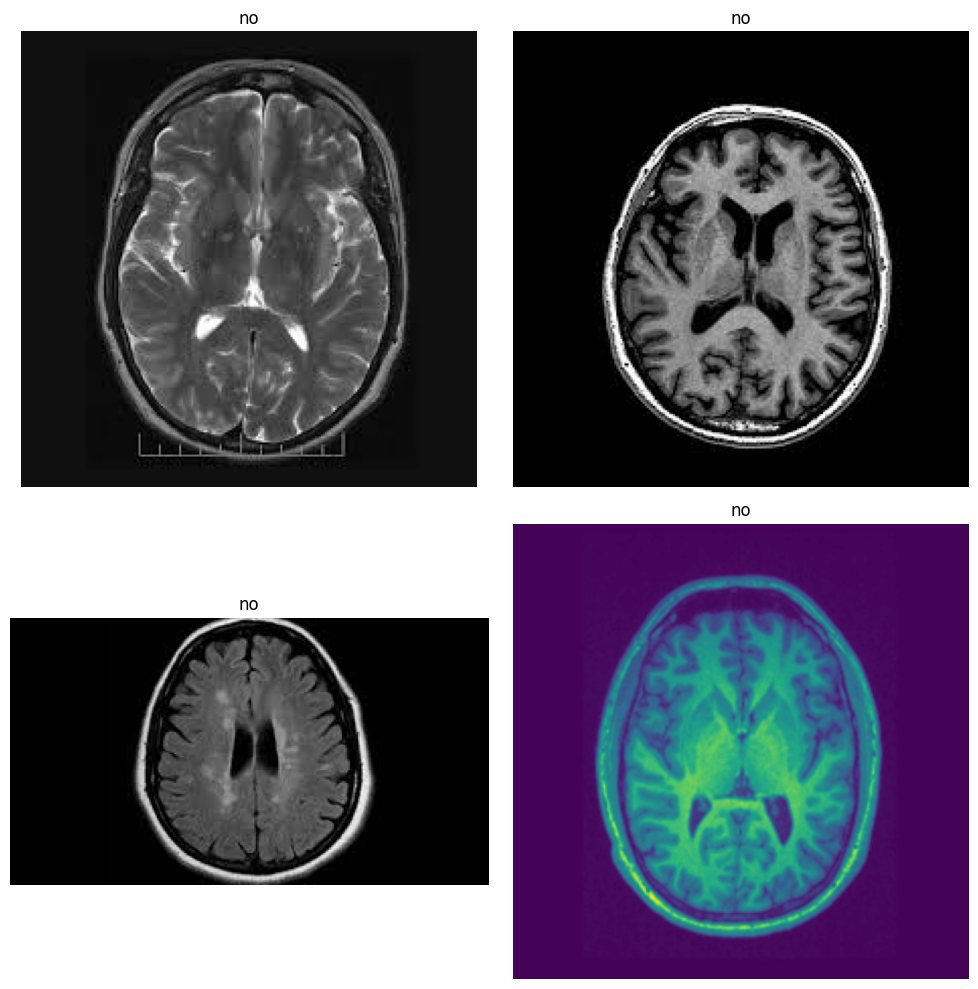

In [19]:
# Display sample images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    image_path = data['file_path'][i]
    image = Image.open(image_path)
    ax.imshow(image)
    ax.set_title(image_path.split('/')[-2])
    ax.axis('off')
plt.tight_layout()
plt.show()


In [54]:
import os

yes_path = '/content/brain_tumor_dataset/yes/'
no_path = '/content/brain_tumor_dataset/no/'

yes_values = os.listdir(yes_path)
no_values = os.listdir(no_path)

X_data = []

for file in yes_values:
    img = cv2.imread(yes_path + file)
    face = cv2.resize(img, (32, 32))
    (b, g, r) = cv2.split(face)
    img = cv2.merge([r, g, b])
    X_data.append(img)


In [56]:
target_x=np.full(len(yes_values),1)
target_y=np.full(len(no_values),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [57]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
import os
import numpy as np
from PIL import Image

# Paths to the 'yes' and 'no' image folders
yes_path = '/content/brain_tumor_dataset/yes/'
no_path = '/content/brain_tumor_dataset/no/'

# Collect 'yes' images
yes_images = []
for filename in os.listdir(yes_path):
    if filename.endswith('.jpg'):
        image_path = os.path.join(yes_path, filename)
        image = Image.open(image_path)
        image_array = np.array(image)
        yes_images.append(image_array)

# Collect 'no' images
no_images = []
for filename in os.listdir(no_path):
    if filename.endswith('.jpg'):
        image_path = os.path.join(no_path, filename)
        image = Image.open(image_path)
        image_array = np.array(image)
        no_images.append(image_array)

# Convert lists to a list of arrays
yes_images = np.array(yes_images, dtype=object)
no_images = np.array(no_images, dtype=object)

# Concatenate the 'yes' and 'no' arrays
data = np.concatenate([yes_images, no_images], axis=0)

# Verify the length of the concatenated array
length_check = len(data) == len(yes_images) + len(no_images)
print(length_check)



True


In [43]:
X_data =[]
for file in yes_values:
    img = cv2.imread(yes_path + file)
    face = cv2.resize(img, (32, 32))
    (b, g, r) = cv2.split(face)
    img = cv2.merge([r, g, b])
    X_data.append(img)

for file in no_values:
    img = cv2.imread(no_path + file)
    face = cv2.resize(img, (32, 32))
    (b, g, r) = cv2.split(face)
    img = cv2.merge([r, g, b])
    X_data.append(img)

In [45]:
X = np.squeeze(X_data)
X.shape

(253, 32, 32, 3)

In [48]:
# normalize data
X = X.astype('float32')
X /= 255

In [58]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

NameError: ignored

In [59]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [60]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [61]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 7s 1s/step - loss: 0.6906 - acc: 0.4789 - val_loss: 0.7185 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 2s 790ms/step - loss: 0.6673 - acc: 0.8158 - val_loss: 0.8345 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 1s 469ms/step - loss: 0.5802 - acc: 0.8158 - val_loss: 1.3919 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 1s 389ms/step - loss: 0.4732 - acc: 0.8158 - val_loss: 2.3455 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 1s 461ms/step - loss: 0.5377 - acc: 0.8158 - val_loss: 1.6738 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 1s 486ms/step - loss: 0.4815 - acc: 0.8158 - val_loss: 1.3142 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 1s 451ms/step - loss: 0.4718 - acc: 0.8158 - val_loss: 1.2743 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 1s 475m

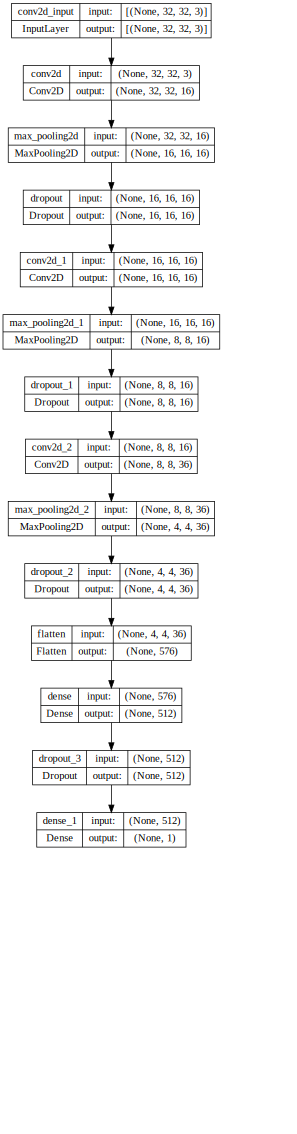

In [66]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [71]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[0])


 Test accuracy: 1.1336805820465088


In [72]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

2/2 [==============================] - 0s 76ms/step


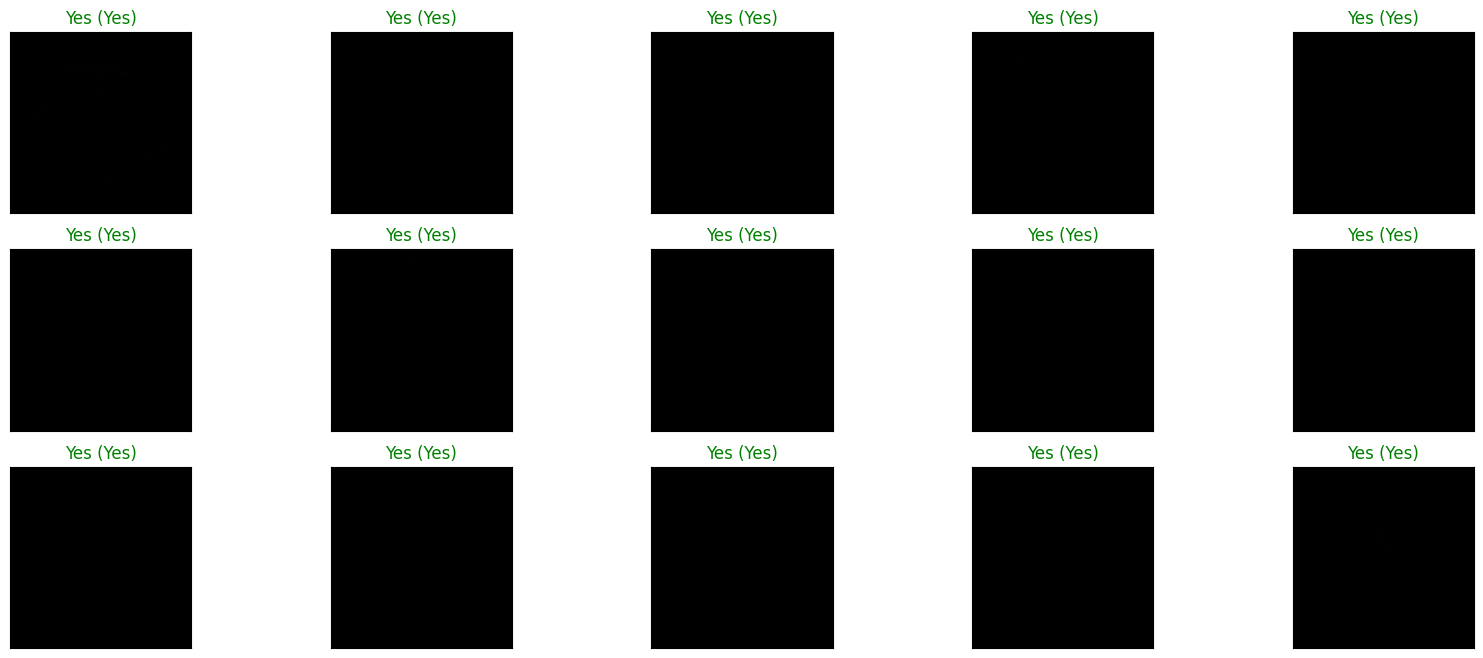

In [73]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()